## Data importation

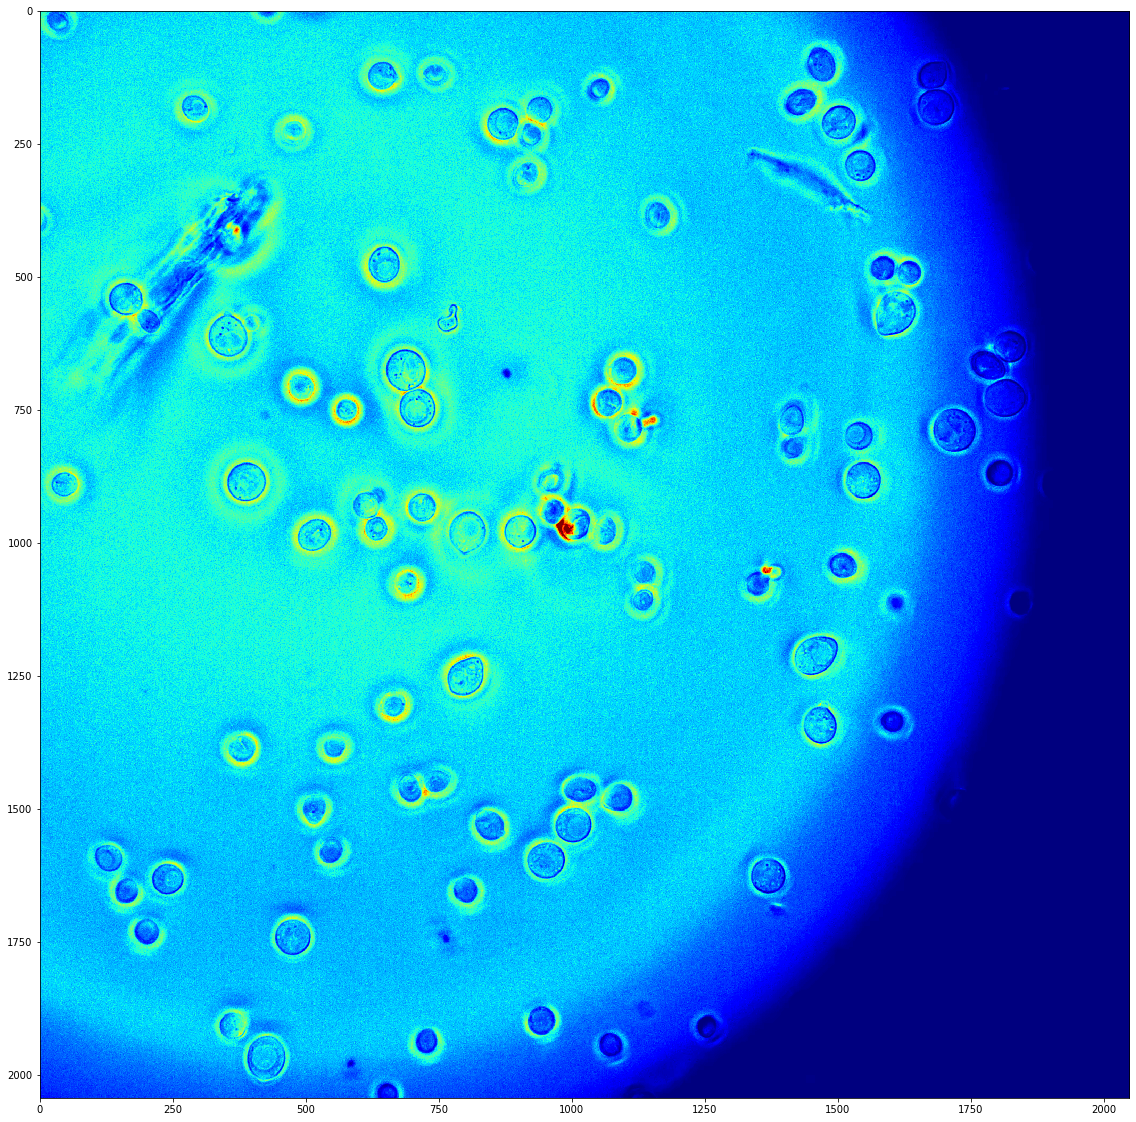

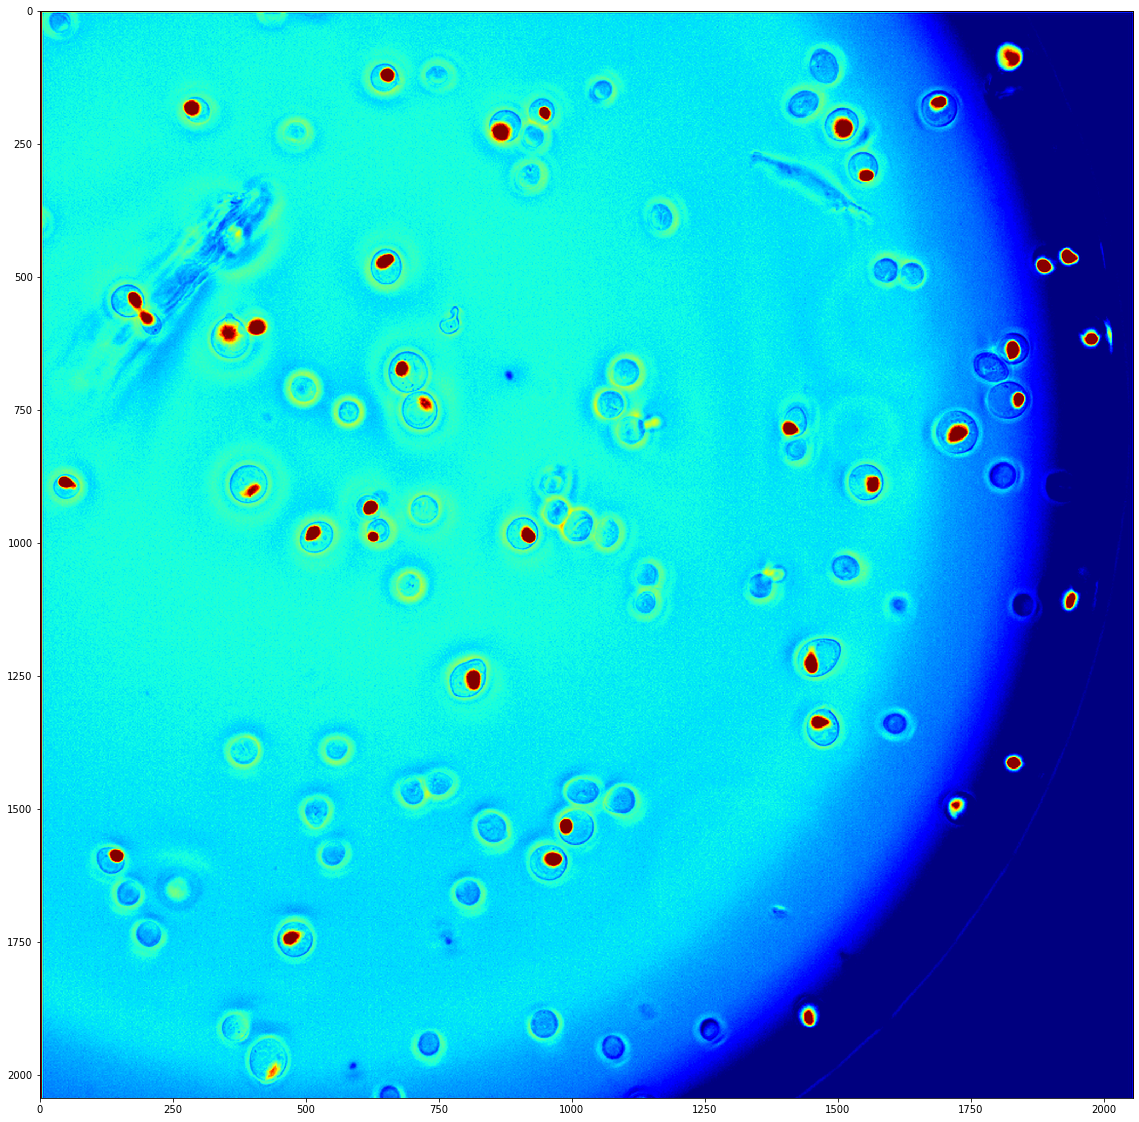

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pims
v0 = pims.open('minute0.mp4')
plt.figure(figsize = (20,20))
plt.imshow(v0[0][:,:,0], cmap='jet')

import skimage.io
import scipy.ndimage
fluoresence_ref = skimage.io.imread('Fluorescence reference (before).png')[:,:,0]
fluoresence_ref_zoom = scipy.ndimage.zoom(fluoresence_ref,max(len(v0[0])/len(fluoresence_ref),len(v0[0][0])/len(fluoresence_ref[0])))
plt.figure(figsize = (20,20))
plt.imshow(fluoresence_ref_zoom, cmap='jet')

### We find where are the alive cells using the Fluoresence picture


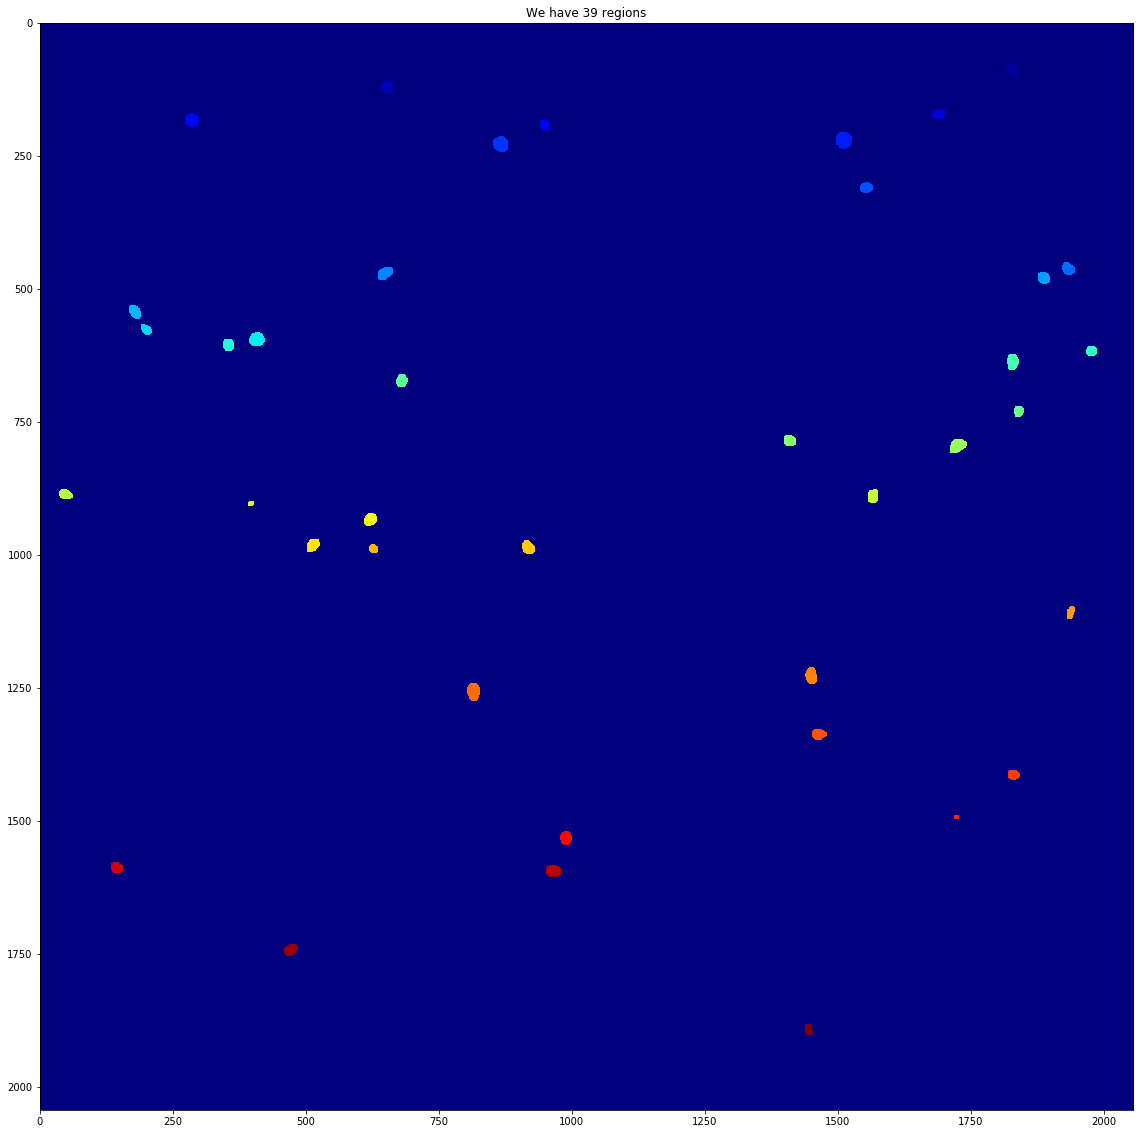

In [3]:
from scipy import ndimage

fluoresence_ref_zoom_bool = np.where(fluoresence_ref_zoom>0.9*np.amax(fluoresence_ref_zoom), 1, 0)
fluoresence_ref_zoom_bool_o = ndimage.morphology.binary_opening(fluoresence_ref_zoom_bool, np.ones((8,8)))
fluoresence_ref_zoom_bool_o_label, fluoresence_ref_zoom_bool_o_label_size = ndimage.label(fluoresence_ref_zoom_bool_o)
plt.figure(figsize = (20,20))
plt.imshow(fluoresence_ref_zoom_bool_o_label, cmap='jet')
plt.title("We have {} regions".format(np.amax(fluoresence_ref_zoom_bool_o_label)))
plt.show()

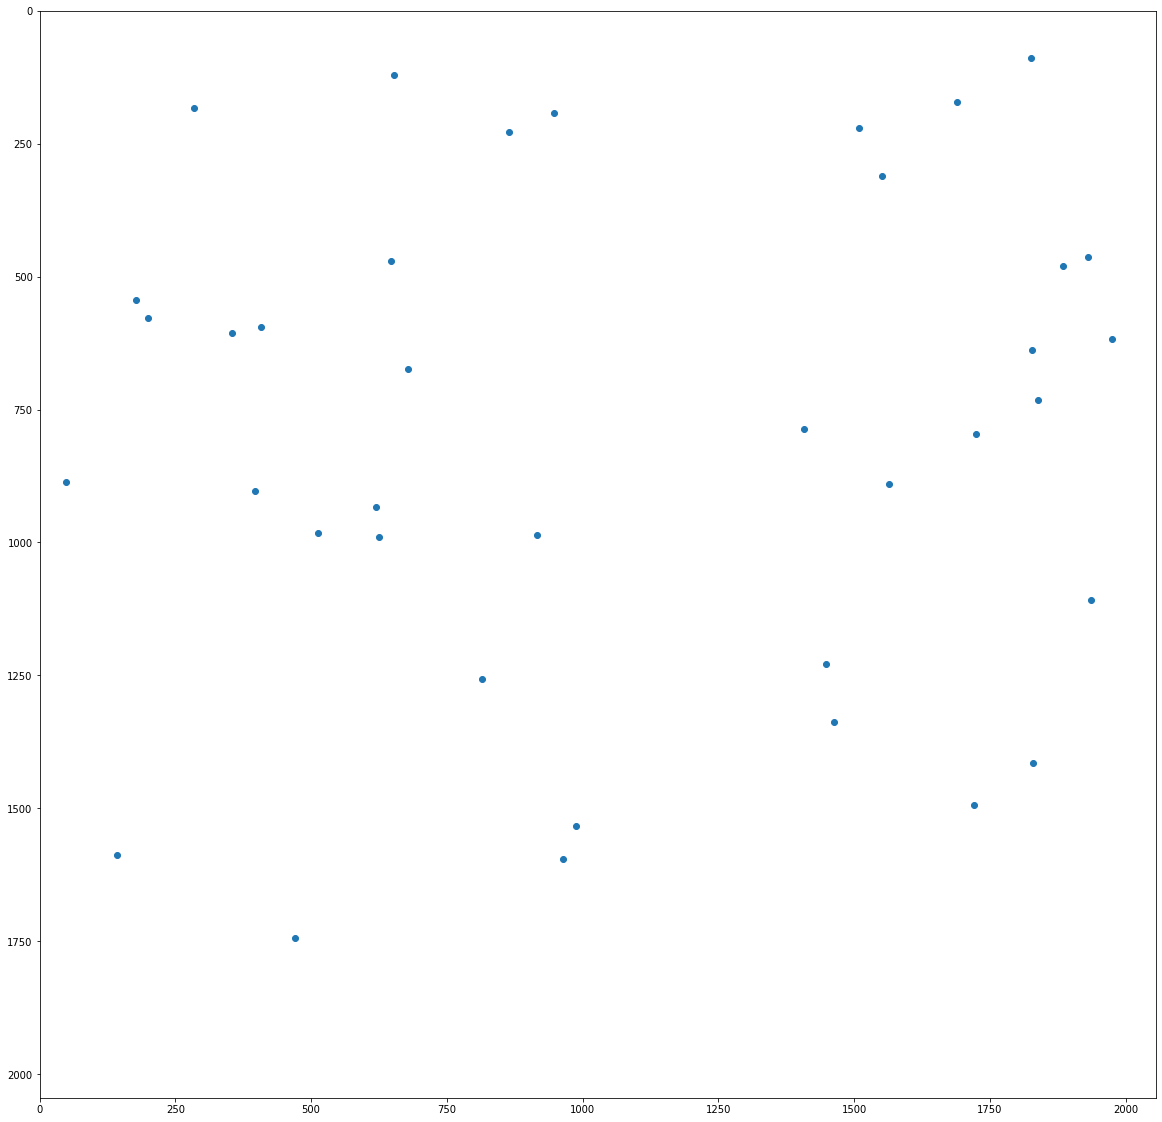

In [4]:
fluoresence_com = ndimage.measurements.center_of_mass(fluoresence_ref_zoom_bool_o,fluoresence_ref_zoom_bool_o_label, np.arange(1,fluoresence_ref_zoom_bool_o_label_size))
plt.figure(figsize = (20,20))
plt.xlim(0,len(fluoresence_ref_zoom_bool_o_label[0]))
plt.ylim(0,len(fluoresence_ref_zoom_bool_o_label))
plt.gca().invert_yaxis()
x,y = zip(*fluoresence_com)
plt.scatter(y,x)
plt.show()

In [5]:
from skimage import filters
v0_roberts = [filters.sobel(im[:,:,0]) for im in v0[0:10]]

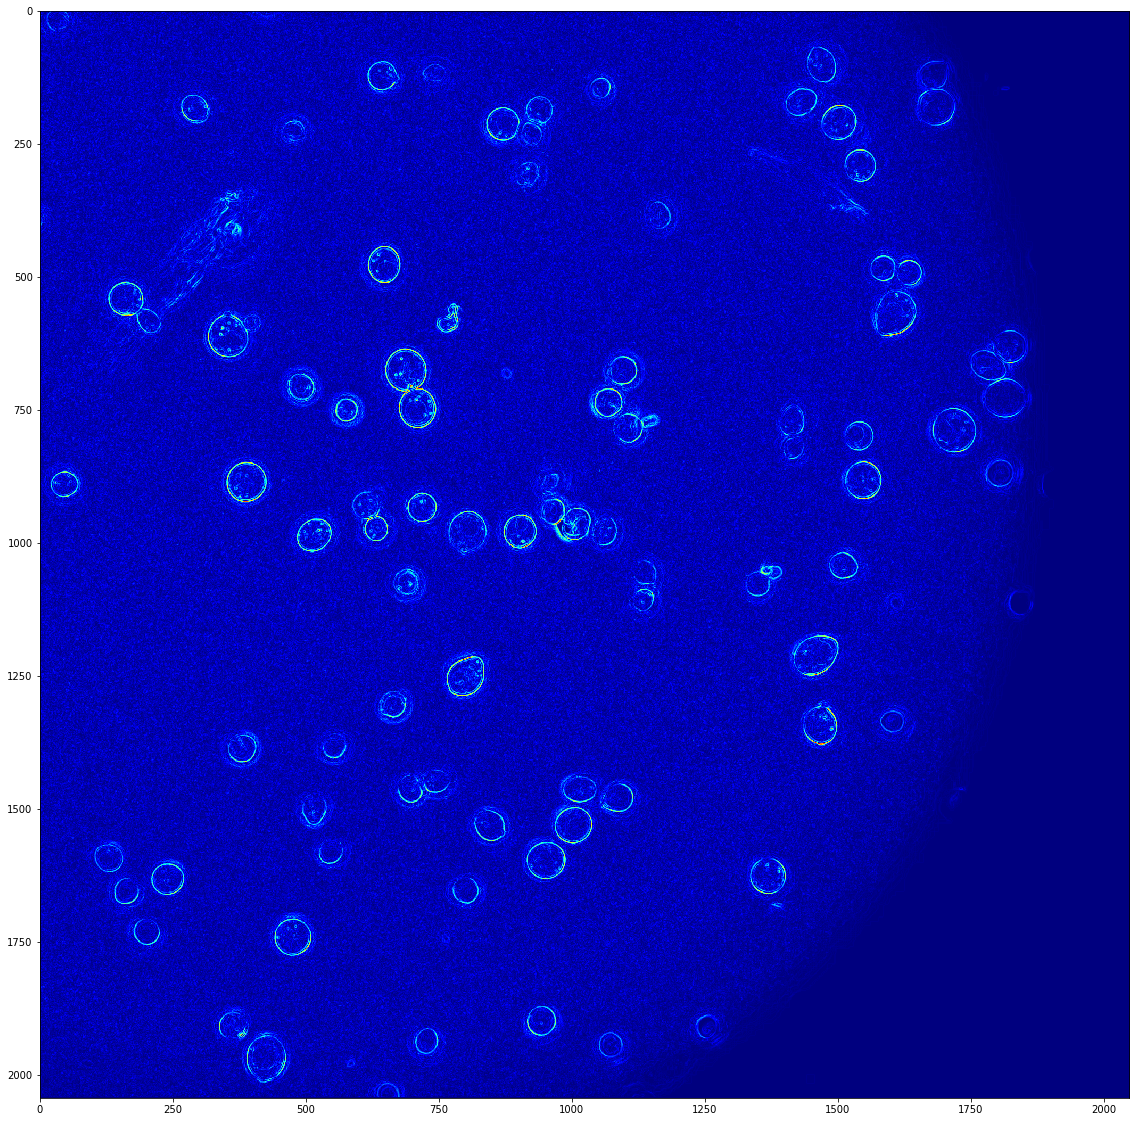

In [6]:
plt.figure(figsize = (20,20))
plt.imshow(v0_roberts[0], cmap='jet')

https://scikit-image.org/docs/dev/auto_examples/edges/plot_active_contours.html#sphx-glr-auto-examples-edges-plot-active-contours-py

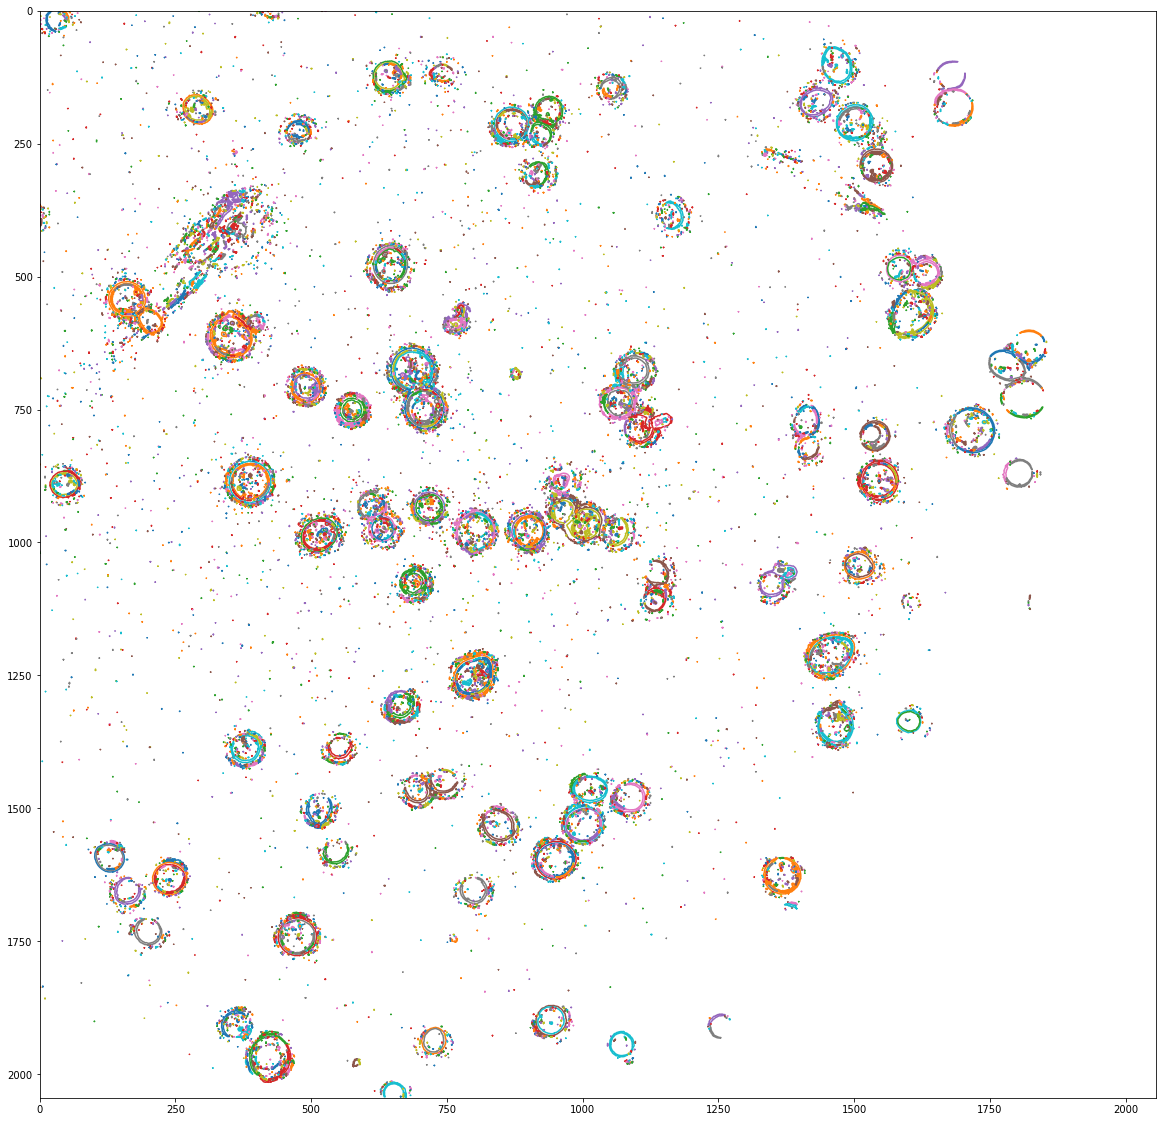

In [7]:
from skimage.measure import find_contours
fluoresence_com[0]
c = find_contours(v0_roberts[0],0.05)
#print(c)
plt.figure(figsize = (20,20))
plt.xlim(0,len(fluoresence_ref_zoom_bool_o_label[0]))
plt.ylim(0,len(fluoresence_ref_zoom_bool_o_label))
plt.gca().invert_yaxis()
for d in c:
    plt.plot(d[:,1], d[:,0])
#plt.plot(c[:,1], c[:,0])
#v0_roberts_contours = [filters.sobel(im[:,:,0]) for x in v0_roberts]